In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("happy_sad_data.csv")
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,Marry You,Doo-Wops & Hooligans,Bruno Mars,6SKwQghsR8AISlxhcwyA9R,2010-10-05,76,230192,0.621,0.332,0.820,0.0,0.104,0.452,-4.865,0.0367,144.905,10,4,happy
1,Sunroof,Sunroof,Nicky Youre,4h4QlmocP3IuwYEj2j14p8,2021-12-03,89,163025,0.768,0.352,0.714,0.0,0.150,0.842,-5.110,0.0401,131.443,10,4,happy
2,Shape of You,Shape of You,Navagio,2796m8y7tOCTUsTQfjmeI4,2022-01-20,55,157647,0.810,0.303,0.636,0.0,0.131,0.687,-6.072,0.0487,101.966,1,4,happy
3,If I Can't Have You,Shawn Mendes (Deluxe),Shawn Mendes,2bT1PH7Cw3J9p3t7nlXCdh,2019-06-19,73,191466,0.691,0.487,0.823,0.0,0.134,0.870,-4.197,0.0623,123.935,2,4,happy
4,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),Jawsh 685,1xQ6trAsedVPCdbtDAmk0c,2020-06-11,79,171374,0.767,0.234,0.481,0.0,0.269,0.761,-8.520,0.0803,150.076,0,4,happy


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2007 non-null   object 
 1   album             2007 non-null   object 
 2   artist            2007 non-null   object 
 3   id                2007 non-null   object 
 4   release_date      2007 non-null   object 
 5   popularity        2007 non-null   int64  
 6   length            2007 non-null   int64  
 7   danceability      2007 non-null   float64
 8   acousticness      2007 non-null   float64
 9   energy            2007 non-null   float64
 10  instrumentalness  2007 non-null   float64
 11  liveness          2007 non-null   float64
 12  valence           2007 non-null   float64
 13  loudness          2007 non-null   float64
 14  speechiness       2007 non-null   float64
 15  tempo             2007 non-null   float64
 16  key               2007 non-null   int64  


In [7]:
columns = ["popularity", "length", "danceability", "acousticness", "energy", "instrumentalness", "liveness", "valence", "loudness", "speechiness", "tempo", "key", "time_signature"]
happy_data = data.loc[data["mood"] == "happy", :][columns].astype(float)
sad_data = data.loc[data["mood"] == "sad", :][columns].astype(float)
histogram_data = data[columns].astype(float)

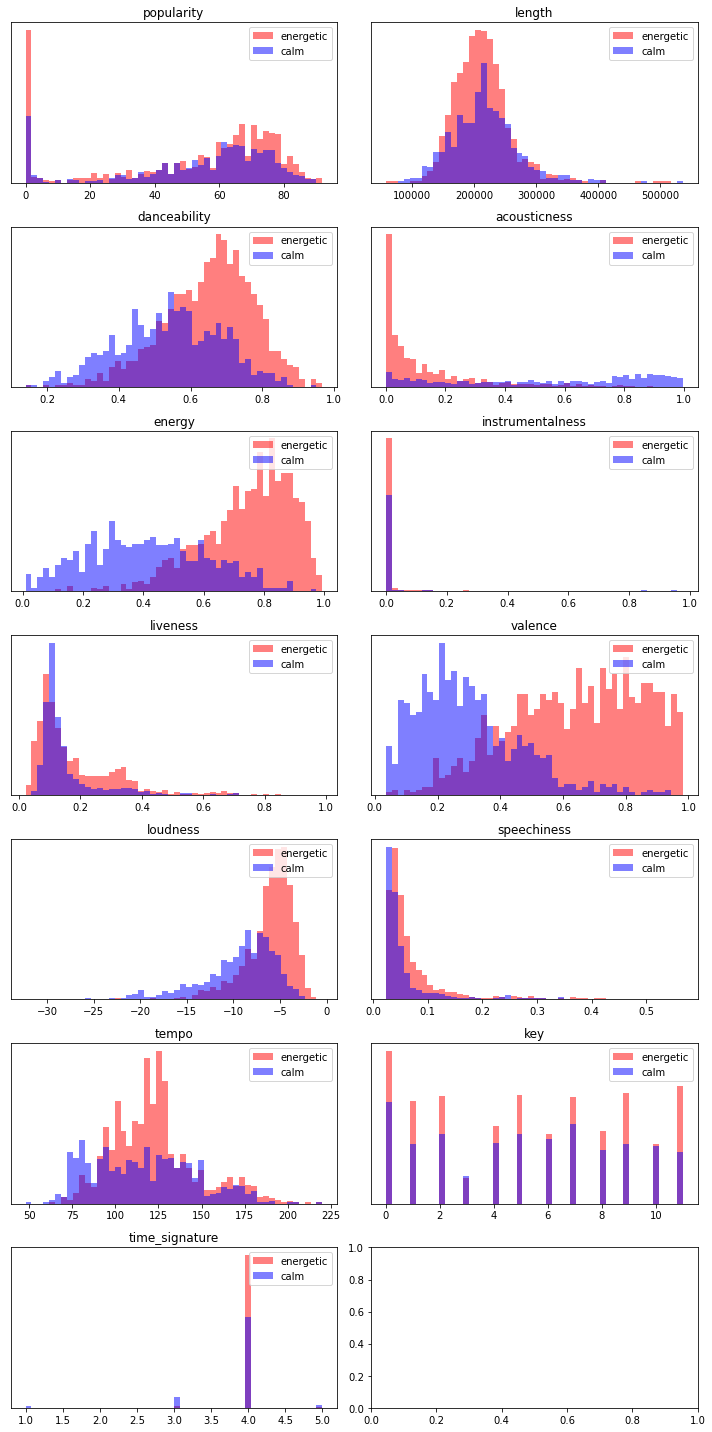

In [9]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(13):
    _, bins = np.histogram(histogram_data.iloc[:,i], bins=50)
    ax[i].hist(happy_data.iloc[:,i], bins=bins, color='r', alpha=.5, label='energetic')
    ax[i].hist(sad_data.iloc[:,i], bins=bins, color='b', alpha=.5, label='calm')
    ax[i].set_title(histogram_data.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

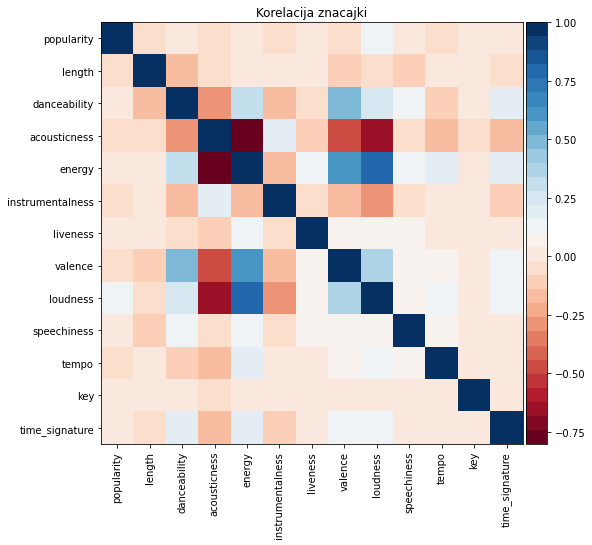

In [10]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = histogram_data.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(histogram_data.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()